<a href="https://colab.research.google.com/github/SergioVinicio/COVID19-Analysis/blob/master/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Analysis is a replication of the guided project I took and got a certificate.**

It is the same base, but I aggregated some extras to the analysis, specially I added my homecountry, Guatemala, to the plots and compare it with other countris in central america.

https://www.coursera.org/account/accomplishments/records/2M525V6QX3LZ

**Objective: Is there a relationship between coronavirus spread and the happiness of the people around the world?** 

**SOURCE OF DATA:** 

 COVID19 Cases: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases 

HAPPINESS REPORT: https://worldhappiness.report/ed/2020/#read


In [39]:
#Upload the data
from google.colab import files
uploaded = files.upload()

Saving COVID19 CASES.csv to COVID19 CASES (2).csv
Saving Hapiness Report.xls to Hapiness Report (2).xls


In [40]:
#Import the libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
print("Modules are imported") 


Modules are imported


In [42]:
#CORONAVIRUS DATASET IN A VARIABLE 
corona_dataset_csv = pd.read_csv("COVID19 CASES.csv")
corona_dataset_csv.head(10)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,65,65,65,69,69,69,69,69,68,68
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13228,13933,14702,15419,16214,16851,17415,18319,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764,30295,31577,32785,34159,35552,37510,39570,41204,42785,44931,47203,49851,52457,55343,57744,59933,62268,64530,67197,69941,72786,75376
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7402,7774,8216,8676,8927,9282,9492,10009,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281,16004,16667,17064,17489,18033,18698,19157,19708,20268,20588,21006,21717,22488,23247,23909,24645,25127,25542,26065,26658,27320,27900
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3089,3090,3092,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131,3134,3135,3137,3143,3144,3149,3151,3150,3159,3162,3168,3174,3177,3184,3189,3203,3211,3211,3405,3419


In [ ]:
#SHAPE of the dataset 
corona_dataset_csv.shape 

(266, 169)

In [ ]:
#Delete unnecesary columns 
corona_dataset_csv.drop(["Lat", "Long"], axis = 1, inplace = True)

In [ ]:
#Group the data by country 
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346


In [ ]:
#Shape of the new dataset 
corona_dataset_aggregated.shape 

(188, 165)

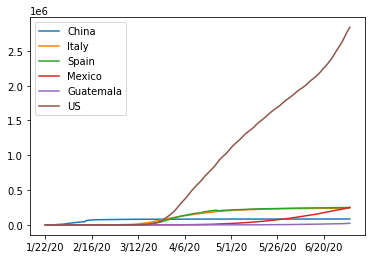

In [ ]:
#View some countries and plot them 
corona_dataset_aggregated.loc["China"].plot() 
corona_dataset_aggregated.loc["Italy"].plot() 
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["Mexico"].plot()
corona_dataset_aggregated.loc["Guatemala"].plot()
corona_dataset_aggregated.loc["US"].plot()
plt.legend()


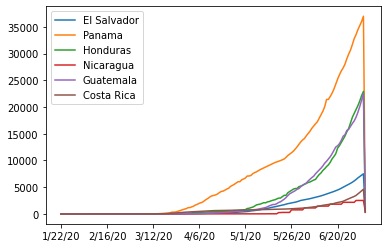

In [89]:
#View some countries and plot them 
corona_dataset_aggregated.loc["El Salvador"].plot() 
corona_dataset_aggregated.loc["Panama"].plot() 
corona_dataset_aggregated.loc["Honduras"].plot()
corona_dataset_aggregated.loc["Nicaragua"].plot()
corona_dataset_aggregated.loc["Guatemala"].plot()
corona_dataset_aggregated.loc["Costa Rica"].plot()
plt.legend()


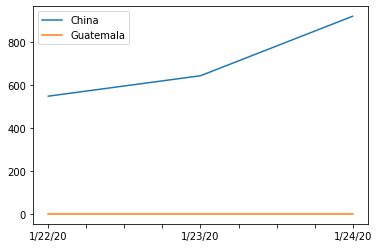

In [43]:
#View the first 3 for CHINA and Guatemala 
corona_dataset_aggregated.loc["China"][:3].plot()
corona_dataset_aggregated.loc["Guatemala"][:3].plot()
plt.legend()

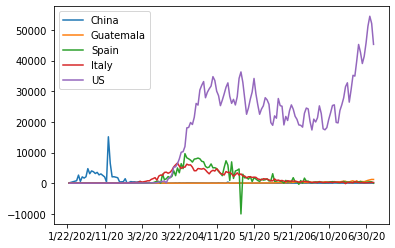

In [ ]:
#Calculate the first derivate to view the maximium rate of change in one day 
corona_dataset_aggregated.loc["China"].diff().plot()
corona_dataset_aggregated.loc["Guatemala"].diff().plot()
corona_dataset_aggregated.loc["Spain"].diff().plot()
corona_dataset_aggregated.loc["Italy"].diff().plot()
corona_dataset_aggregated.loc["US"].diff().plot()
plt.legend()

In [ ]:
#Calculate the maximum infection rate of all countries by using a loop
countries = list(corona_dataset_aggregated.index) 
max_infection_rates = [] 
for c in countries : max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

#Agregate the new variable as a new column
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates 
corona_dataset_aggregated.head() 


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,915.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,90.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,430.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,47.0


In [ ]:
#Create a new dataframe with only needed columns
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"]) 
corona_data.head()


,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,90.0
Algeria,430.0
Andorra,79.0
Angola,47.0


In [71]:
#Save the dataset of happiness in a new variable  

happiness_report_csv = pd.read_excel("Hapiness Report (2).xls")
happiness_report_csv.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2019,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,0.502474,0.341482,NaN,NaN,1.412905,0.594884,NaN,NaN,0.374930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2019,4.995318,9.456569,0.686365,69.000000,0.777351,-0.100784,0.914284,0.681080,0.273827,0.336628,NaN,NaN,2.613766,0.523243,NaN,0.303250,0.397716,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN
2,Algeria,2019,4.744627,9.537369,0.803259,66.099998,0.385083,-0.017092,0.740609,0.584944,0.215198,NaN,NaN,NaN,1.804374,0.380298,NaN,0.276000,0.304484,NaN,NaN,NaN,NaN,0.107644,NaN,0.179286
3,Argentina,2019,6.085561,9.772140,0.896371,69.000000,0.817053,-0.202615,0.830460,0.825965,0.319055,0.273853,NaN,NaN,2.258976,0.371203,NaN,0.460706,0.396574,NaN,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
4,Australia,2019,7.233995,10.725492,0.942774,73.900002,0.917537,0.117622,0.430209,0.770044,0.202190,0.468700,NaN,NaN,1.695034,0.234315,NaN,0.343333,0.577556,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.518140


In [72]:
#Drop useless columns 
useless_cols = ["Generosity", "Perceptions of corruption","Positive affect","GINI index (World Bank estimate), average 2000-2017, unbalanced panel","year","Most people can be trusted, Gallup", "Negative affect","Democratic Quality", "Delivery Quality", "GINI index (World Bank estimate)", "gini of household income reported in Gallup, by wp5-year","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"]
happiness_report_csv.drop(useless_cols, axis = 1, inplace = True) 
happiness_report_csv.head()


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,2.375092,7.458469,0.419973,52.400002,0.393656,0.341482,1.412905,0.594884
1,Albania,4.995318,9.456569,0.686365,69.000000,0.777351,0.336628,2.613766,0.523243
2,Algeria,4.744627,9.537369,0.803259,66.099998,0.385083,NaN,1.804374,0.380298
3,Argentina,6.085561,9.772140,0.896371,69.000000,0.817053,0.273853,2.258976,0.371203
4,Australia,7.233995,10.725492,0.942774,73.900002,0.917537,0.468700,1.695034,0.234315


In [73]:
#Change the indices of the dataframe
happiness_report_csv.set_index("Country name", inplace = True )


In [74]:
#View of datasets 
corona_data.head()
corona_data.shape


(188, 1)

In [75]:
#View of datasets 
happiness_report_csv.head()
happiness_report_csv.shape 


(138, 8)

In [76]:
data = corona_data.join(happiness_report_csv, how = "inner")
data.head() 


,max_infection_rate,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
Afghanistan,915.0,2.375092,7.458469,0.419973,52.400002,0.393656,0.341482,1.412905,0.594884
Albania,90.0,4.995318,9.456569,0.686365,69.000000,0.777351,0.336628,2.613766,0.523243
Algeria,430.0,4.744627,9.537369,0.803259,66.099998,0.385083,NaN,1.804374,0.380298
Argentina,2886.0,6.085561,9.772140,0.896371,69.000000,0.817053,0.273853,2.258976,0.371203
Australia,497.0,7.233995,10.725492,0.942774,73.900002,0.917537,0.468700,1.695034,0.234315


In [77]:
data.shape

(127, 9)

In [78]:
#Correlation 
data.corr() 


,max_infection_rate,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
max_infection_rate,1.000000,0.109241,0.160896,0.106369,0.147540,0.047262,-0.141797,-0.052182,-0.086408
Life Ladder,0.109241,1.000000,0.736459,0.738331,0.772155,0.590042,-0.093905,-0.540272,-0.868624
Log GDP per capita,0.160896,0.736459,1.000000,0.752791,0.846622,0.417839,-0.256867,-0.739014,-0.812755
Social support,0.106369,0.738331,0.752791,1.000000,0.693265,0.424717,-0.232185,-0.608512,-0.769168
Healthy life expectancy at birth,0.147540,0.772155,0.846622,0.693265,1.000000,0.463660,-0.191987,-0.694492,-0.825108
Freedom to make life choices,0.047262,0.590042,0.417839,0.424717,0.463660,1.000000,0.351153,-0.241208,-0.425480
Confidence in national government,-0.141797,-0.093905,-0.256867,-0.232185,-0.191987,0.351153,1.000000,0.120585,0.185699
Standard deviation of ladder by country-year,-0.052182,-0.540272,-0.739014,-0.608512,-0.694492,-0.241208,0.120585,1.000000,0.836590
Standard deviation/Mean of ladder by country-year,-0.086408,-0.868624,-0.812755,-0.769168,-0.825108,-0.425480,0.185699,0.836590,1.000000


In [79]:
data.head()

,max_infection_rate,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Confidence in national government,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
Afghanistan,915.0,2.375092,7.458469,0.419973,52.400002,0.393656,0.341482,1.412905,0.594884
Albania,90.0,4.995318,9.456569,0.686365,69.000000,0.777351,0.336628,2.613766,0.523243
Algeria,430.0,4.744627,9.537369,0.803259,66.099998,0.385083,NaN,1.804374,0.380298
Argentina,2886.0,6.085561,9.772140,0.896371,69.000000,0.817053,0.273853,2.258976,0.371203
Australia,497.0,7.233995,10.725492,0.942774,73.900002,0.917537,0.468700,1.695034,0.234315


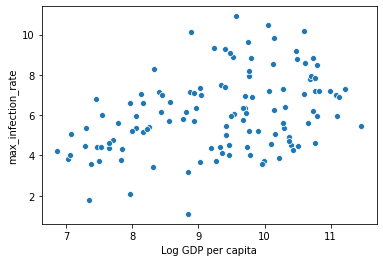

In [80]:
x = data["Log GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y)) 


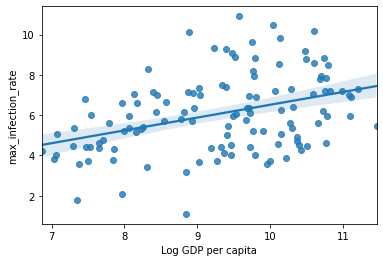

In [81]:
sns.regplot(x,np.log(y)) 

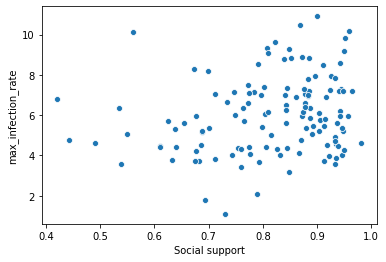

In [82]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y)) 


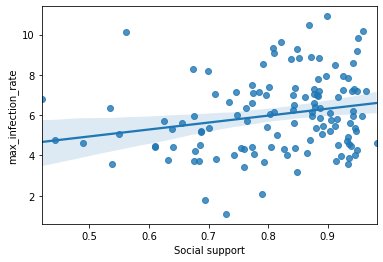

In [83]:
sns.regplot(x,np.log(y)) 

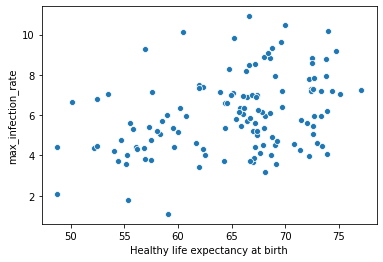

In [85]:
x = data["Healthy life expectancy at birth"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y)) 


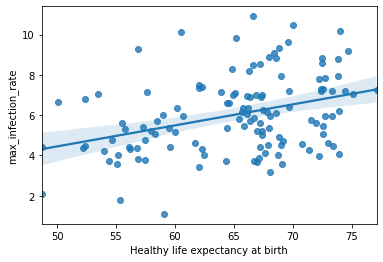

In [86]:
sns.regplot(x,np.log(y)) 

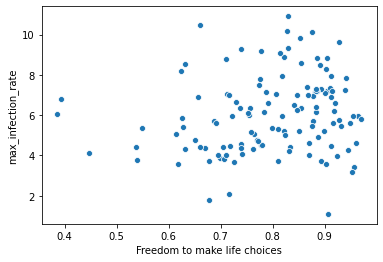

In [87]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y)) 


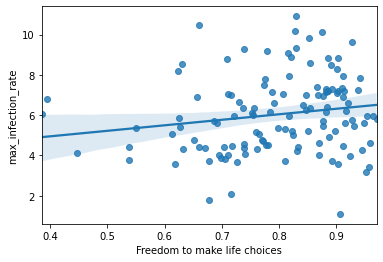

In [88]:
sns.regplot(x,np.log(y)) 

For a further analysis it could be interesting to repeat it with number of deaths instead of the number of infections.  As a first conclusion, we could say that, indeed, there is a positive correlation between the number of cases and the high quality of life of the countries. 